In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import torch.nn as nn

In [ ]:
transform = transforms.Compose([
 transforms.Resize(256),                    
 transforms.ToTensor()
])

train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)

test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

testloader = DataLoader(test_data, batch_size=4, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
model = models.resnet34(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(512,10)

In [ ]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.optim as optim
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_accu = []
train_losses = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss=0
    correct=0
    total=0

    for batch_idx, (data, target) in enumerate(train_loader):
        # enumberate() : 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줌
        target = target.type(torch.LongTensor)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # 항상 backpropagation 하기전에 미분(gradient)을 zero로 만들어주고 시작해야 한다.
        output = model(data)
        loss = loss_fn(output, target) # criterion = loss_fn
        loss.backward()
        optimizer.step() # step() : 파라미터를 업데이트함

        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    train_loss=running_loss/len(train_loader)
    accu=100.*correct/total
   
    train_accu.append(accu)
    train_losses.append(train_loss)
    
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
eval_losses=[]
eval_accu=[]

def test(model, device, test_loader):
    model.eval() # dropout,batchnorm등의 기능을 비활성화 시켜 추론 모드로 조정
    running_loss=0
    correct=0
    total=0
    with torch.no_grad(): # autograd engine을 비활성화 시켜 필요한 메모리를 줄여주고 연산속도를 증가시킴
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            running_loss += loss_fn(output, target).sum().item() # loss.item() 으로 loss가 갖고 있는 스칼라 값을 가져올 수 있음
            pred = output.max(1, keepdim=True)[1]# 텐서에서 최대값을 구하는 함수, keepdim ( bool ) – 출력 텐서가 dim유지되었는지 여부. 기본값: False., https://www.inflearn.com/questions/282058
            total += target.size(0)
            #correct += pred.eq(labels).sum().item()
            correct += pred.eq(target.view_as(pred)).sum().item() # pred.eq(data)는 pred배열과 data가 일치하느냐를 검사

        test_loss = running_loss/len(test_loader.dataset)  
        accu=100.*correct/total
 
        eval_losses.append(test_loss)
        eval_accu.append(accu)
        print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu)) 
        print('-----------------------------------')

In [ ]:
epochs=10
for epoch in range(1, epochs+1):
  print(f"Epoch {epoch}")
  train(model, device, trainloader, optimizer, epoch)
  test(model, device, testloader)

Epoch 1
Train Loss: 0.645 | Accuracy: 79.592
Test Loss: 0.070 | Accuracy: 90.720
-----------------------------------
Epoch 2
Train Loss: 0.305 | Accuracy: 90.080
Test Loss: 0.059 | Accuracy: 92.240
-----------------------------------
Epoch 3
Train Loss: 0.203 | Accuracy: 93.502
Test Loss: 0.051 | Accuracy: 93.070
-----------------------------------
Epoch 4
Train Loss: 0.145 | Accuracy: 95.222
Test Loss: 0.059 | Accuracy: 92.680
-----------------------------------
Epoch 5
Train Loss: 0.109 | Accuracy: 96.504
Test Loss: 0.041 | Accuracy: 94.600
-----------------------------------
Epoch 6
Train Loss: 0.080 | Accuracy: 97.438
Test Loss: 0.044 | Accuracy: 94.450
-----------------------------------
Epoch 7
Train Loss: 0.061 | Accuracy: 98.026
Test Loss: 0.048 | Accuracy: 94.110
-----------------------------------
Epoch 8
Train Loss: 0.048 | Accuracy: 98.486
Test Loss: 0.047 | Accuracy: 94.050
-----------------------------------
Epoch 9
Train Loss: 0.044 | Accuracy: 98.592
Test Loss: 0.046 | 

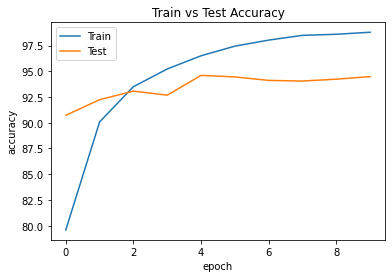

In [ ]:
import matplotlib.pyplot as plt


plt.plot(train_accu)
plt.plot(eval_accu)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
 
plt.show()

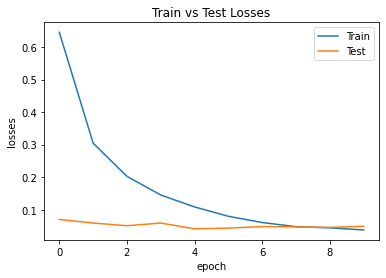

In [ ]:
plt.plot(train_losses)
plt.plot(eval_losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
 
plt.show()

In [ ]:
classes = ['airplane', 'automobile', 'bird','cat','deer', 'dog', 'frog','horse','ship','truck']

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data, target in testloader:
        data, target = data.to(device),target.to(device)
        outputs = model(data)
        _, predictions = torch.max(outputs, 1)
        #predictions = outputs.max(1, keepdim=True)[1]
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(target, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 97.8 %
Accuracy for class: automobile is 96.6 %
Accuracy for class: bird  is 87.6 %
Accuracy for class: cat   is 88.0 %
Accuracy for class: deer  is 95.3 %
Accuracy for class: dog   is 93.4 %
Accuracy for class: frog  is 96.9 %
Accuracy for class: horse is 96.5 %
Accuracy for class: ship  is 96.2 %
Accuracy for class: truck is 96.5 %
